# Data Science Hands-on

A typical data science process might look like this:

- Project Scoping / Data Collection
- Exploratory Analysis
- Data Cleaning
- Feature Engineering
- Model Training (including cross-validation to tune hyper-parameters)
- Project Delivery / Insights


**First day**     

The goal of this notebook is:
- Explore houses dataset
- Make some plots to check different variables
- Select interesting features to apply ML algorithms
- Fill missing values
- Transform some features to more informative variables


[Pandas cheatsheet](https://github.com/creyesp/houses-project/blob/add-binder-configs/pandas_cheatsheet.md)

Also you can follow the checklist of a [Data Science project](https://github.com/creyesp/ml_project_checklist)


# Load packages
<img src='img/ecosystem.png'>

In [1]:
# Build-in library
from datetime import datetime
import os
from unidecode import unidecode

# Third-party libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Custom module
import handson

%matplotlib notebook

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = None

In [2]:
if not os.path.exists('../data/'):
    os.makedirs('../data/')

# Table of content
1. [Frame the Problem and Look at the Big Picture](#Frame-the-Problem-and-Look-at-the-Big-Picture)
1. [Data adquisition](#Data-Adquisition)
2. [Exploratory data analysis](#Exploratory-data-analysis)
3. [Data cleaning](#Data-cleaning)
4. [Feature Engineering](#Feature-Engineering)

# Frame the Problem and Look at the Big Picture
## What are some questions that I can answer with this dataset?
Understand your dataset is the first step of any data science project. You need to know the limitations and make a list of possible questions that could be answered with this dataset. These questions can reduce, expand or modify the scope of our project.

examples: 
- We could have great ideas but poor data
- We could have incorrect question for our dataset

**Data**: 
- We have a set of features of houses for sale in a specific time windows.  

**Business question/objective**:
- **New infocasas functionality**: Is it possible to offer an estimated price for selling given house characteristics (uploaded by owner in the webpage) without asking an appraiser? 


# Data Adquisition
## Load dataset


In [3]:
# path_file = '../data/dataset_preprocessed.csv'
path_file = '../data/join_preprocessed.csv'

# Read csv file and assign to df variable
df_raw = pd.read_csv(path_file)
df_raw.shape

(85080, 46)

In [4]:
def preprocessed_dataset(df, inplace=False):
    if df.empty:
        raise ValueError('Empty dataset')
        
    if not inplace:
        df_pre = df.copy()
    else:
        df_pre = df

    cat_trans = (df_pre
                 .drop(columns=['url', 'referencia'])
                 .select_dtypes(include='O')
                 .fillna('')
                 .apply(lambda x: x.str.lower().apply(lambda y: unidecode(y)))
                 )

    df_pre.loc[:, cat_trans.columns] = cat_trans
    return df_pre

def verification_dataset(df):
    """Check data to expected values."""
    if df.empty:
        raise ValueError('Empty dataset')
        
    df = df.drop_duplicates(subset=['referencia'])
    
    # Add more filter if you need
    selector_outliers = (
        (df['precio'] <= 2e6)
        & (df['banos'].fillna(1).between(1, 3,))
        & (df['dormitorios'].fillna(0).between(0, 5))
        & (df['garajes'].fillna(0).between(0, 4))
        & (df['m2_de_la_terraza'].fillna(0).between(0, 400))
        & (df['m2_edificados'].fillna(20) >= 20)
        & (df['m2_del_terreno'].fillna(20) >= 20)
        & (df['gastos_comunes'].fillna(0).between(0, 5e4))
        & (df['ano_de_construccion'].fillna(1880).between(1880, datetime.now().year))
    )
    df = df[selector_outliers].reset_index()
    return df

In [5]:
df = verification_dataset(preprocessed_dataset(df_raw))
# df = validate_dataset(df_raw)

In [6]:
df.shape

(29936, 47)

# Exploratory data analysis
- How many rows are in our dataset?
- How many columns are in our dataset?
- What data types are in the columns?
- Are there missing values in the dataset? Do we infer missing values? how?
- Are there outlier values? 

Data types:
- **Numeric**:
    - *Discrete*: variables that have finite possible values.
    - *Continuous*:  variables that can have an infinite number of possible values
- **Categorical, variables that have 2 or more possible values**:
    - *Ordinal*: these values have a meaningful order or rank. Ex. marks, A, B, C
    - *Nominal*: the order of those values have no meaning. Ex, names
- **Unstructured**:
    - *text*
    
| Data Type | Question Type| Possible Responses|
|---|---|---|
| Categorical | What's your sex?| **Male** or **Female**|
| Numerical Discrete | How many cars do you own? | **1, 2, 3** for example |
| Numerical Continuous | How tall are you? | **172.5** cm for example | 
| Unstructurated text | Could you describe the property | soleado apartamento a estrenar en carrasco sur... | 

## General information about our dataset

In [7]:
# Look at the first 5 rows of our dataset
df.head()

,index,acepta_permuta,altura_permitida,ambientes,ambientes_extra,ano_de_construccion,aptos_por_piso,banos,banos_extra,cantidad_de_pisos,casco,descripcion,direccion,disposicion,distancia_al_mar,dormitorios,dormitorios_extra,estado,extra,financia,garajes,garajes_extra,gastos_comunes,gastos_comunes_moneda,hectareas,huespedes,inmobiliaria,longitud_frente,m2_de_la_terraza,m2_del_terreno,m2_edificados,oficina,penthouse,piso,plantas,plantas_extra,precio,precio_moneda,referencia,sobre,tipo_propiedad,tipo_publicacion,titulo_publicacion,url,vista_al_mar,vivienda_social,zona
0,0,nan,nan,nan,False,2016.00,4.00,2.00,False,3.00,nan,soleado apartamento a estrenar en carrasco sur...,,al frente,nan,2.00,False,a estrenar,"terraza,placard en dormitorio,placard en cocin...",nan,1.00,False,12500.00,nan,nan,nan,reyes ruano,nan,13.00,nan,84.00,nan,nan,2.00,1.00,False,325000.00,nan,D590F,avenida,apartamentos,venta,apartamento a estrenar de 2 dormitorios en car...,https://www.infocasas.com.uy/apartamento-a-est...,nan,nan,carrasco
1,1,nan,nan,nan,False,nan,nan,3.00,True,nan,nan,"casa construida en el ano 1970, en una sola pl...",,,nan,4.00,False,buen estado,"garaje,calefaccion,barbacoa",nan,2.00,False,nan,nan,nan,nan,bado & asociados sotheby's,nan,nan,551.00,551.00,nan,nan,nan,nan,False,1100000.00,nan,7283B,,casas,venta,casa en una sola planta con 5700 m2 pegado al ...,https://www.infocasas.com.uy/casa-en-una-sola-...,nan,nan,carrasco norte
2,2,nan,nan,nan,False,nan,nan,3.00,True,nan,nan,refrencia: 1751 en parietti...\nubicado en un...,,,nan,3.00,False,buen estado,"terraza,garaje,calefaccion individual,piscina",nan,2.00,False,nan,nan,nan,nan,parietti negocios inmobiliarios srl.,nan,nan,nan,142.00,nan,nan,nan,nan,False,440000.00,nan,74008,,apartamentos,venta,carrasco rambla venta apartamento 3 dormitorio...,https://www.infocasas.com.uy/carrasco-rambla-v...,nan,nan,carrasco
3,3,nan,nan,nan,False,2000.00,10.00,3.00,True,nan,nan,imperdible! venta de apartamento 4 dormitorios...,,al frente,nan,4.00,False,excelente estado,"vestidor,terraza lavadero,terraza,placard en d...",nan,2.00,False,38000.00,nan,nan,nan,etxe bienes raices,nan,nan,nan,290.00,nan,nan,3.00,3.00,True,800000.00,nan,EA74C,,apartamentos,venta,apartamento en venta 4 dormitorios,https://www.infocasas.com.uy/apartamento-en-ve...,nan,nan,puerto buceo
4,4,nan,nan,nan,False,2017.00,nan,1.00,False,nan,nan,apartamentos de diseno. proyectamos cuidadosam...,tres cruces,,nan,2.00,False,buen estado,garaje,1.00,1.00,False,140.00,nan,nan,nan,re/max\nnicolas alvarez gonzalez\nre/max,nan,nan,nan,nan,nan,nan,nan,3.00,True,150000.00,nan,2406A,,apartamentos,venta,"apartamento,2 dormitorios, bano nuevo",https://www.infocasas.com.uy/apartamento2-dorm...,nan,1.00,tres cruces


In [8]:
# Check the name of columns (features)
df.columns

Index(['index', 'acepta_permuta', 'altura_permitida', 'ambientes',
       'ambientes_extra', 'ano_de_construccion', 'aptos_por_piso', 'banos',
       'banos_extra', 'cantidad_de_pisos', 'casco', 'descripcion', 'direccion',
       'disposicion', 'distancia_al_mar', 'dormitorios', 'dormitorios_extra',
       'estado', 'extra', 'financia', 'garajes', 'garajes_extra',
       'gastos_comunes', 'gastos_comunes_moneda', 'hectareas', 'huespedes',
       'inmobiliaria', 'longitud_frente', 'm2_de_la_terraza', 'm2_del_terreno',
       'm2_edificados', 'oficina', 'penthouse', 'piso', 'plantas',
       'plantas_extra', 'precio', 'precio_moneda', 'referencia', 'sobre',
       'tipo_propiedad', 'tipo_publicacion', 'titulo_publicacion', 'url',
       'vista_al_mar', 'vivienda_social', 'zona'],
      dtype='object')

In [9]:
# Get number of rows and columns
df.shape

(29936, 47)

In [10]:
# Get data types of columns
df.dtypes.sort_values()

garajes_extra               bool
dormitorios_extra           bool
banos_extra                 bool
plantas_extra               bool
ambientes_extra             bool
index                      int64
plantas                  float64
piso                     float64
precio_moneda            float64
penthouse                float64
gastos_comunes           float64
m2_edificados            float64
m2_del_terreno           float64
m2_de_la_terraza         float64
longitud_frente          float64
huespedes                float64
vista_al_mar             float64
hectareas                float64
vivienda_social          float64
precio                   float64
oficina                  float64
gastos_comunes_moneda    float64
financia                 float64
acepta_permuta           float64
altura_permitida         float64
ambientes                float64
ano_de_construccion      float64
garajes                  float64
banos                    float64
cantidad_de_pisos        float64
casco     

In [11]:
# Check if there are missing values in each column
df.isnull().any().sort_values(ascending=False)

gastos_comunes_moneda     True
oficina                   True
financia                  True
garajes                   True
casco                     True
gastos_comunes            True
vivienda_social           True
hectareas                 True
huespedes                 True
cantidad_de_pisos         True
longitud_frente           True
m2_de_la_terraza          True
m2_del_terreno            True
distancia_al_mar          True
m2_edificados             True
penthouse                 True
ano_de_construccion       True
vista_al_mar              True
acepta_permuta            True
altura_permitida          True
ambientes                 True
piso                      True
dormitorios               True
aptos_por_piso            True
precio_moneda             True
banos                     True
plantas                   True
banos_extra              False
descripcion              False
direccion                False
disposicion              False
ambientes_extra          False
zona    

In [12]:
# Get percentage of missing values from each column
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)

gastos_comunes_moneda   100.00
precio_moneda           100.00
huespedes                99.99
casco                    99.92
hectareas                99.77
altura_permitida         99.10
longitud_frente          98.91
penthouse                98.40
acepta_permuta           96.49
vista_al_mar             94.38
vivienda_social          92.76
ambientes                90.67
oficina                  87.95
financia                 84.04
distancia_al_mar         80.03
aptos_por_piso           75.25
cantidad_de_pisos        74.59
m2_de_la_terraza         72.27
m2_del_terreno           68.81
piso                     63.62
garajes                  59.86
gastos_comunes           50.88
ano_de_construccion      38.14
plantas                  27.32
dormitorios              10.63
m2_edificados             7.50
banos                     3.94
banos_extra               0.00
ambientes_extra           0.00
descripcion               0.00
direccion                 0.00
disposicion               0.00
zona    

In [13]:
# Get number of unique values for each feature
df.nunique().sort_values(ascending=False)

index                    29936
url                      29936
referencia               29936
descripcion              28482
titulo_publicacion       24539
extra                    15474
direccion                 7569
precio                    2210
inmobiliaria              1271
gastos_comunes            1007
m2_del_terreno             858
m2_edificados              611
m2_de_la_terraza           216
ano_de_construccion        124
zona                        90
piso                        75
longitud_frente             68
aptos_por_piso              43
cantidad_de_pisos           38
hectareas                   28
altura_permitida            26
tipo_propiedad              13
estado                       8
ambientes                    7
distancia_al_mar             7
dormitorios                  6
disposicion                  5
garajes                      4
sobre                        4
banos                        3
plantas                      3
garajes_extra                2
dormitor

## Statistic resume
### Numeric variables
Look at statistic info for each columns and check which columns has unusual behavior. 
- Are all positive values?
- is standard deviation different to zero?
- How long is percentil 75 from max?
- Could do you infer if there are some feature with outliers?

In [14]:
# Get a resume of numerical columns from our dataset
(df
 .describe()
#  .drop(index=['count'])
 .style
     .applymap(lambda x: 'color: red' if x < 0 else 'color: black')
     .bar(color='#ee1f5f')
     .format({'precio': "${:,.0f}", 'gastos_comunes': "${:,.0f}"})
)

,index,acepta_permuta,altura_permitida,ambientes,ano_de_construccion,aptos_por_piso,banos,cantidad_de_pisos,casco,distancia_al_mar,dormitorios,financia,garajes,gastos_comunes,gastos_comunes_moneda,hectareas,huespedes,longitud_frente,m2_de_la_terraza,m2_del_terreno,m2_edificados,oficina,penthouse,piso,plantas,precio,precio_moneda,vista_al_mar,vivienda_social
count,29936,1051,270,2792,18518,7410,28757,7606,25,5979,26754,4778,12017,"$14,706",0,69,2,326,8302,9336,27691,3608,480,10890,21757,"$29,936",0,1681,2167
mean,20983.3,1,17.6519,2.22994,1988.16,5.24211,1.61321,8.36879,1,427.212,2.23645,1,1.40484,"$6,744",nan,1982.62,4.5,37.4971,23.4655,252.281,111.212,1,1,1035.87,1.29986,"$258,628",nan,1,1
std,16228.7,0,10.6239,1.62262,30.0145,93.0365,0.75737,24.7099,0,354.213,1.17764,0,0.66222,"$7,444",nan,8981.66,2.12132,102.027,38.1864,224.579,101.788,0,0,106478,0.612494,"$232,416",nan,0,0
min,0,1,5,1,1880,1,1,1,1,0,0,1,1,$0,nan,1,3,1,1,20,20,1,1,0,1,$1,nan,1,1
25%,8830.5,1,9,1,1963,2,1,4,1,100,1,1,1,"$2,300",nan,3,3.75,10,4,78,53,1,1,1,1,"$126,000",nan,1,1
50%,17981.5,1,16,2,1996,3,1,10,1,300,2,1,1,"$4,000",nan,5,4.5,12,10,166,75,1,1,3,1,"$176,200",nan,1,1
75%,27061.2,1,27,3,2017,4,2,10,1,500,3,1,2,"$8,500",nan,20,5.25,19.75,25,369,130,1,1,6,1,"$300,000",nan,1,1
max,85010,1,135,7,2020,8000,3,2101,1,1000,5,1,4,"$50,000",nan,50000,6,880,400,999,987,1,1,1.11111e+07,3,"$2,000,000",nan,1,1


In [15]:
# Get percentile 5 and 95
df.quantile([0.05, 0.95])

,index,acepta_permuta,altura_permitida,ambientes,ambientes_extra,ano_de_construccion,aptos_por_piso,banos,banos_extra,cantidad_de_pisos,casco,distancia_al_mar,dormitorios,dormitorios_extra,financia,garajes,garajes_extra,gastos_comunes,gastos_comunes_moneda,hectareas,huespedes,longitud_frente,m2_de_la_terraza,m2_del_terreno,m2_edificados,oficina,penthouse,piso,plantas,plantas_extra,precio,precio_moneda,vista_al_mar,vivienda_social
0.05,1727.75,1.00,8.45,1.00,0.00,1935.00,1.00,1.00,0.00,2.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,nan,2.00,3.15,8.15,2.00,40.00,34.00,1.00,1.00,0.00,1.00,0.00,75000.00,nan,1.00,1.00
0.95,53340.00,1.00,31.00,6.00,0.00,2019.00,10.00,3.00,1.00,13.00,1.00,1000.00,4.00,0.00,1.00,3.00,0.00,22000.00,nan,4549.20,5.85,165.00,91.95,750.00,300.00,1.00,1.00,10.00,3.00,1.00,700000.00,nan,1.00,1.00


### Categeries resume

In [16]:
# Get a resume of no numerical columns from our dataset. 
# Hint: use include='O' as argument in resume function
df.describe(include='O')

,descripcion,direccion,disposicion,estado,extra,inmobiliaria,referencia,sobre,tipo_propiedad,tipo_publicacion,titulo_publicacion,url,zona
count,29936,29936,29936,29936,29936,29936,29936,29936,29936,29936,29936,29936,29936
unique,28482,7569,5,8,15474,1271,29936,4,13,1,24539,29936,90
top,,,al frente,buen estado,,las torres,FC292,,apartamentos,venta,apartamento en venta 2 dormitorios,https://www.infocasas.com.uy/moderno-apartamen...,pocitos
freq,196,19101,17859,11901,5539,1134,1,20716,20335,29936,185,1,4820


In [17]:
df['extra'].sample(5)

12546                                                     
2745     placard en cocina,living comedor,dormitorio de...
14514                                               garaje
7348     terraza,placard en dormitorio,placard en cocin...
7814                                                      
Name: extra, dtype: object


## Visualization
[Seaborn](https://seaborn.pydata.org/) is a very useful package to make EDA (built on [Matplotlib](https://matplotlib.org/)), it's a statistical data visualization package and it's easy to create univarible and bivarible plots.
<img src="img/seaborn.png" />

### Univarible plots
- [Distribution](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot)
- [Histograms](https://seaborn.pydata.org/generated/seaborn.distplot.html#seaborn.distplot)
- [Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot)


[Text(0.5, 1.0, 'Log(Price distribution)')]

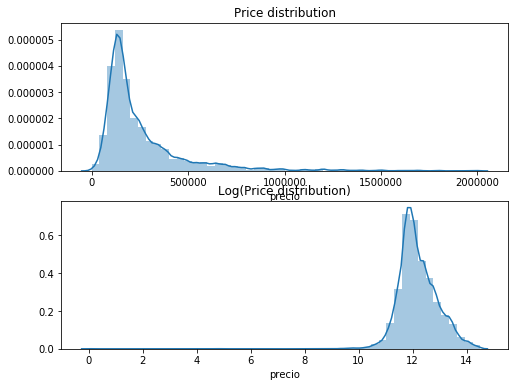

In [18]:
# Plot price distribution
f, ax = plt.subplots(2, 1, figsize=(8, 6) )
sns.distplot(df['precio'].dropna(), ax=ax[0])
sns.distplot(np.log(df['precio'].dropna()), ax=ax[1])
ax[0].set(title='Price distribution')
ax[1].set(title='Log(Price distribution)')

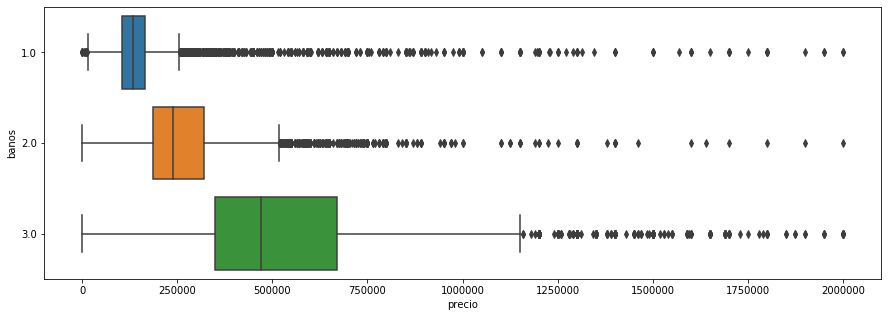

In [19]:
# Plot boxplots of price group by some categorical feature 
# ex. estado, barrio, banos, dormitorios, tipo_propiedad
f, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(y='banos', x='precio', orient='h', data=df)

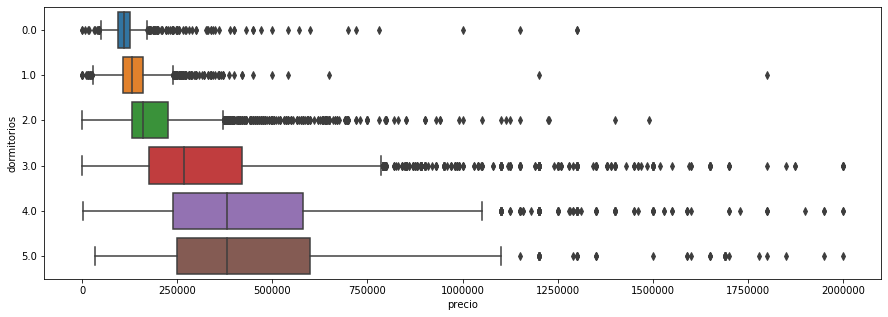

In [20]:
f, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(y='dormitorios', x='precio', orient='h', data=df)

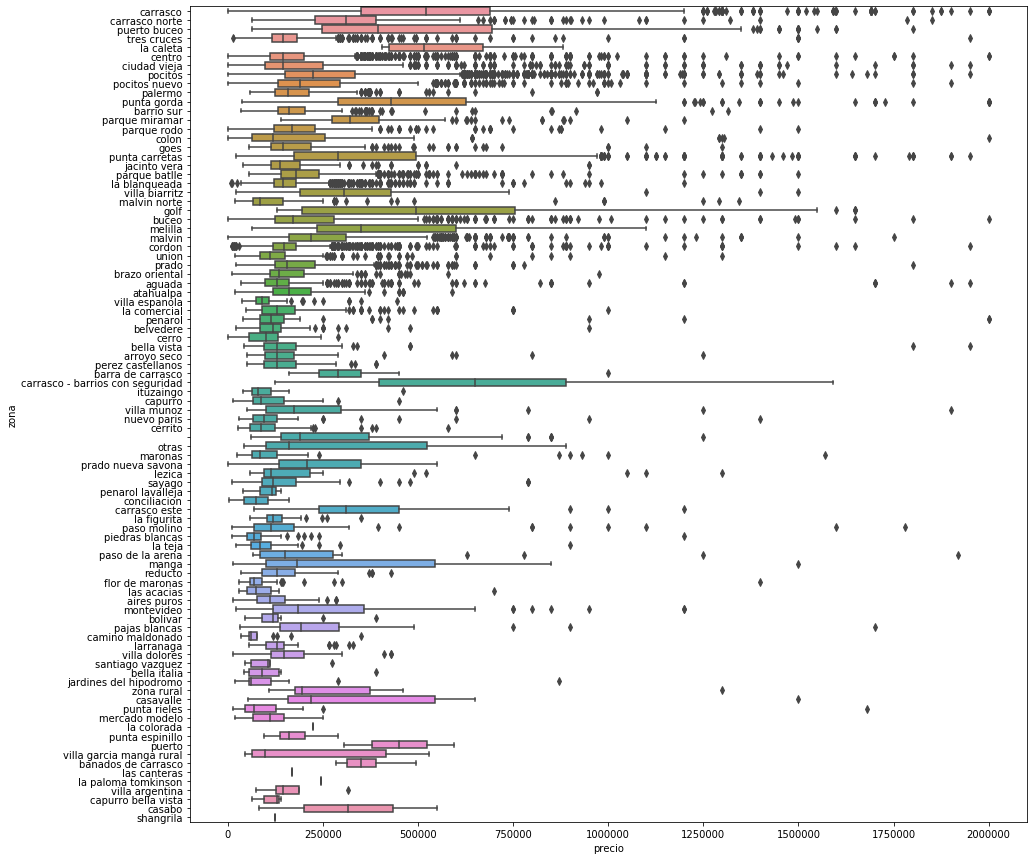

In [21]:
f, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(y='zona', x='precio', data=df, )

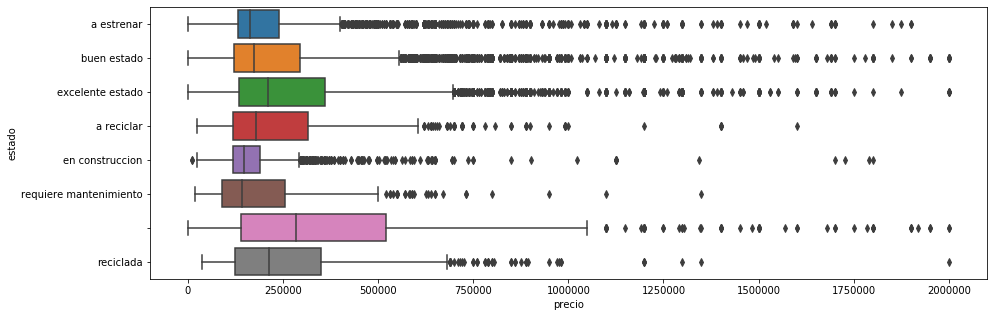

In [22]:
f, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(y='estado', x='precio', orient='h', data=df, ax=ax)

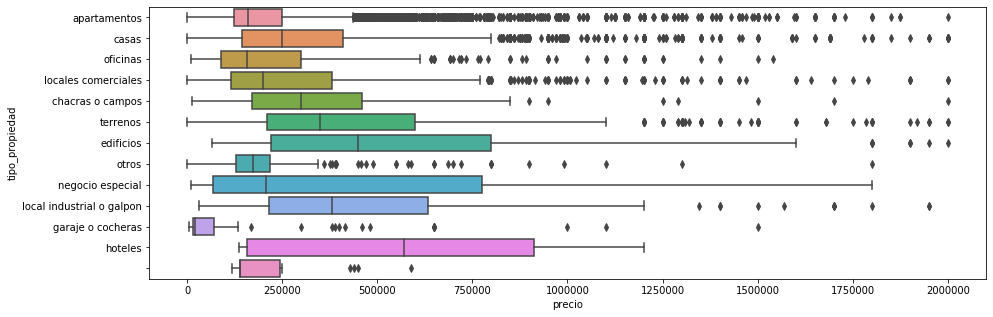

In [23]:
f, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(y='tipo_propiedad', x='precio', orient='h', data=df)

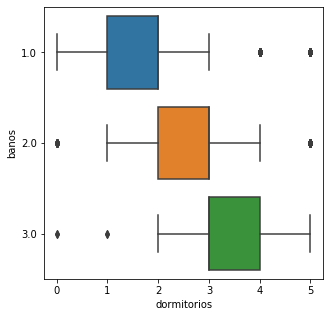

In [24]:
f, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y='banos', x='dormitorios', orient='h', data=df, ax=ax)

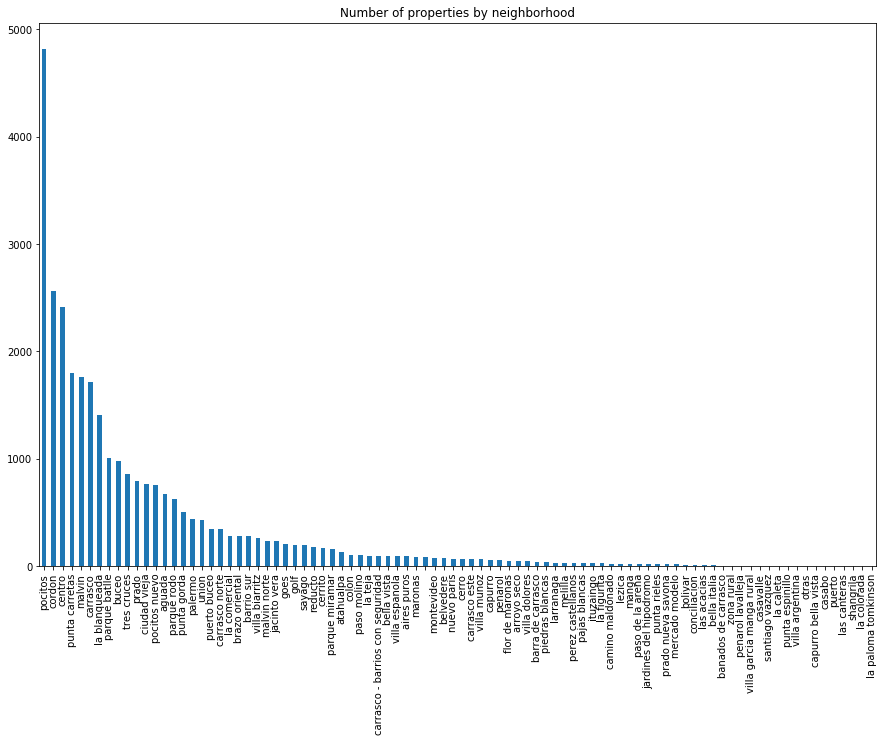

In [25]:
# Plot histogram of barrio feature
f, ax = plt.subplots(figsize=(15,10))
df['zona'].value_counts().plot(kind='bar', ax=ax)
ax.set(title='Number of properties by neighborhood');


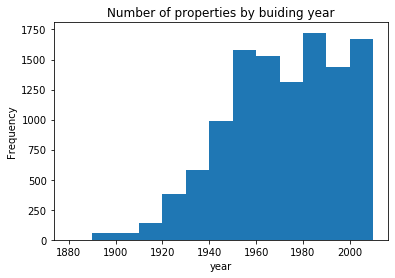

In [26]:
# Make a histogram of "ano_de_construccion" between 1880 and 2019, in bins of 10 years
f, ax = plt.subplots()
df['ano_de_construccion'].plot.hist(bins=np.arange(1880, 2020, 10), ax=ax)
ax.set(title='Number of properties by buiding year', xlabel='year');


### bivarible plots
- [Scatter](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot)
- [Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot)
- [Relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)


That single points in the lower-left and lower-right corner are outliers. Its values are so extreme that it skews the entire graph, so much that we cannot even see any variation on the main set of data. 

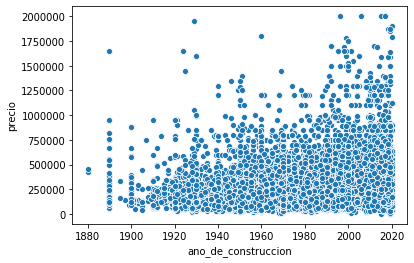

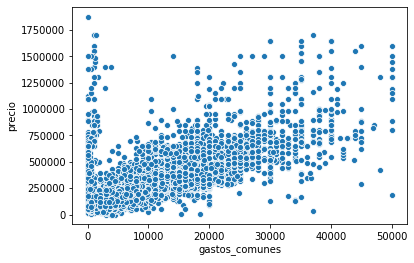

In [27]:
# make scatter plot, ex ano_de_construccion and precio, or gastos_comunes vs precio
f, ax = plt.subplots()
sns.scatterplot(x='ano_de_construccion', y='precio', data=df, ax=ax)

f, ax = plt.subplots()
sns.scatterplot(x='gastos_comunes', y='precio', data=df, ax=ax)

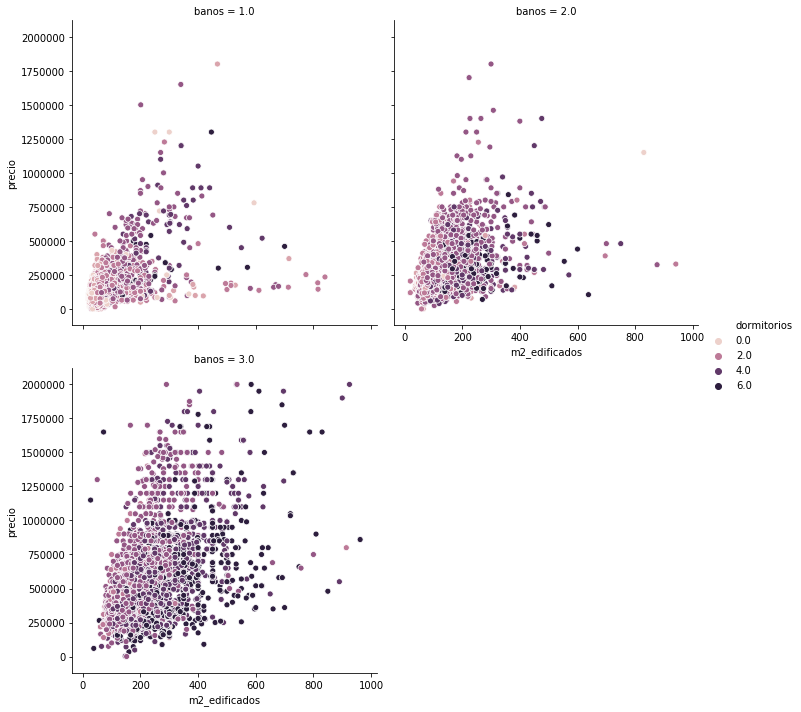

In [28]:
# Make a relplot using for example m2_edificados, precio, banos, dormitorios
sns.relplot(
    x="m2_edificados", 
    y="precio",
    col="banos",
    col_wrap=2,
    hue='dormitorios',
    data=df,
)

/home/cesar/software/houses-project/venv/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/cesar/software/houses-project/venv/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


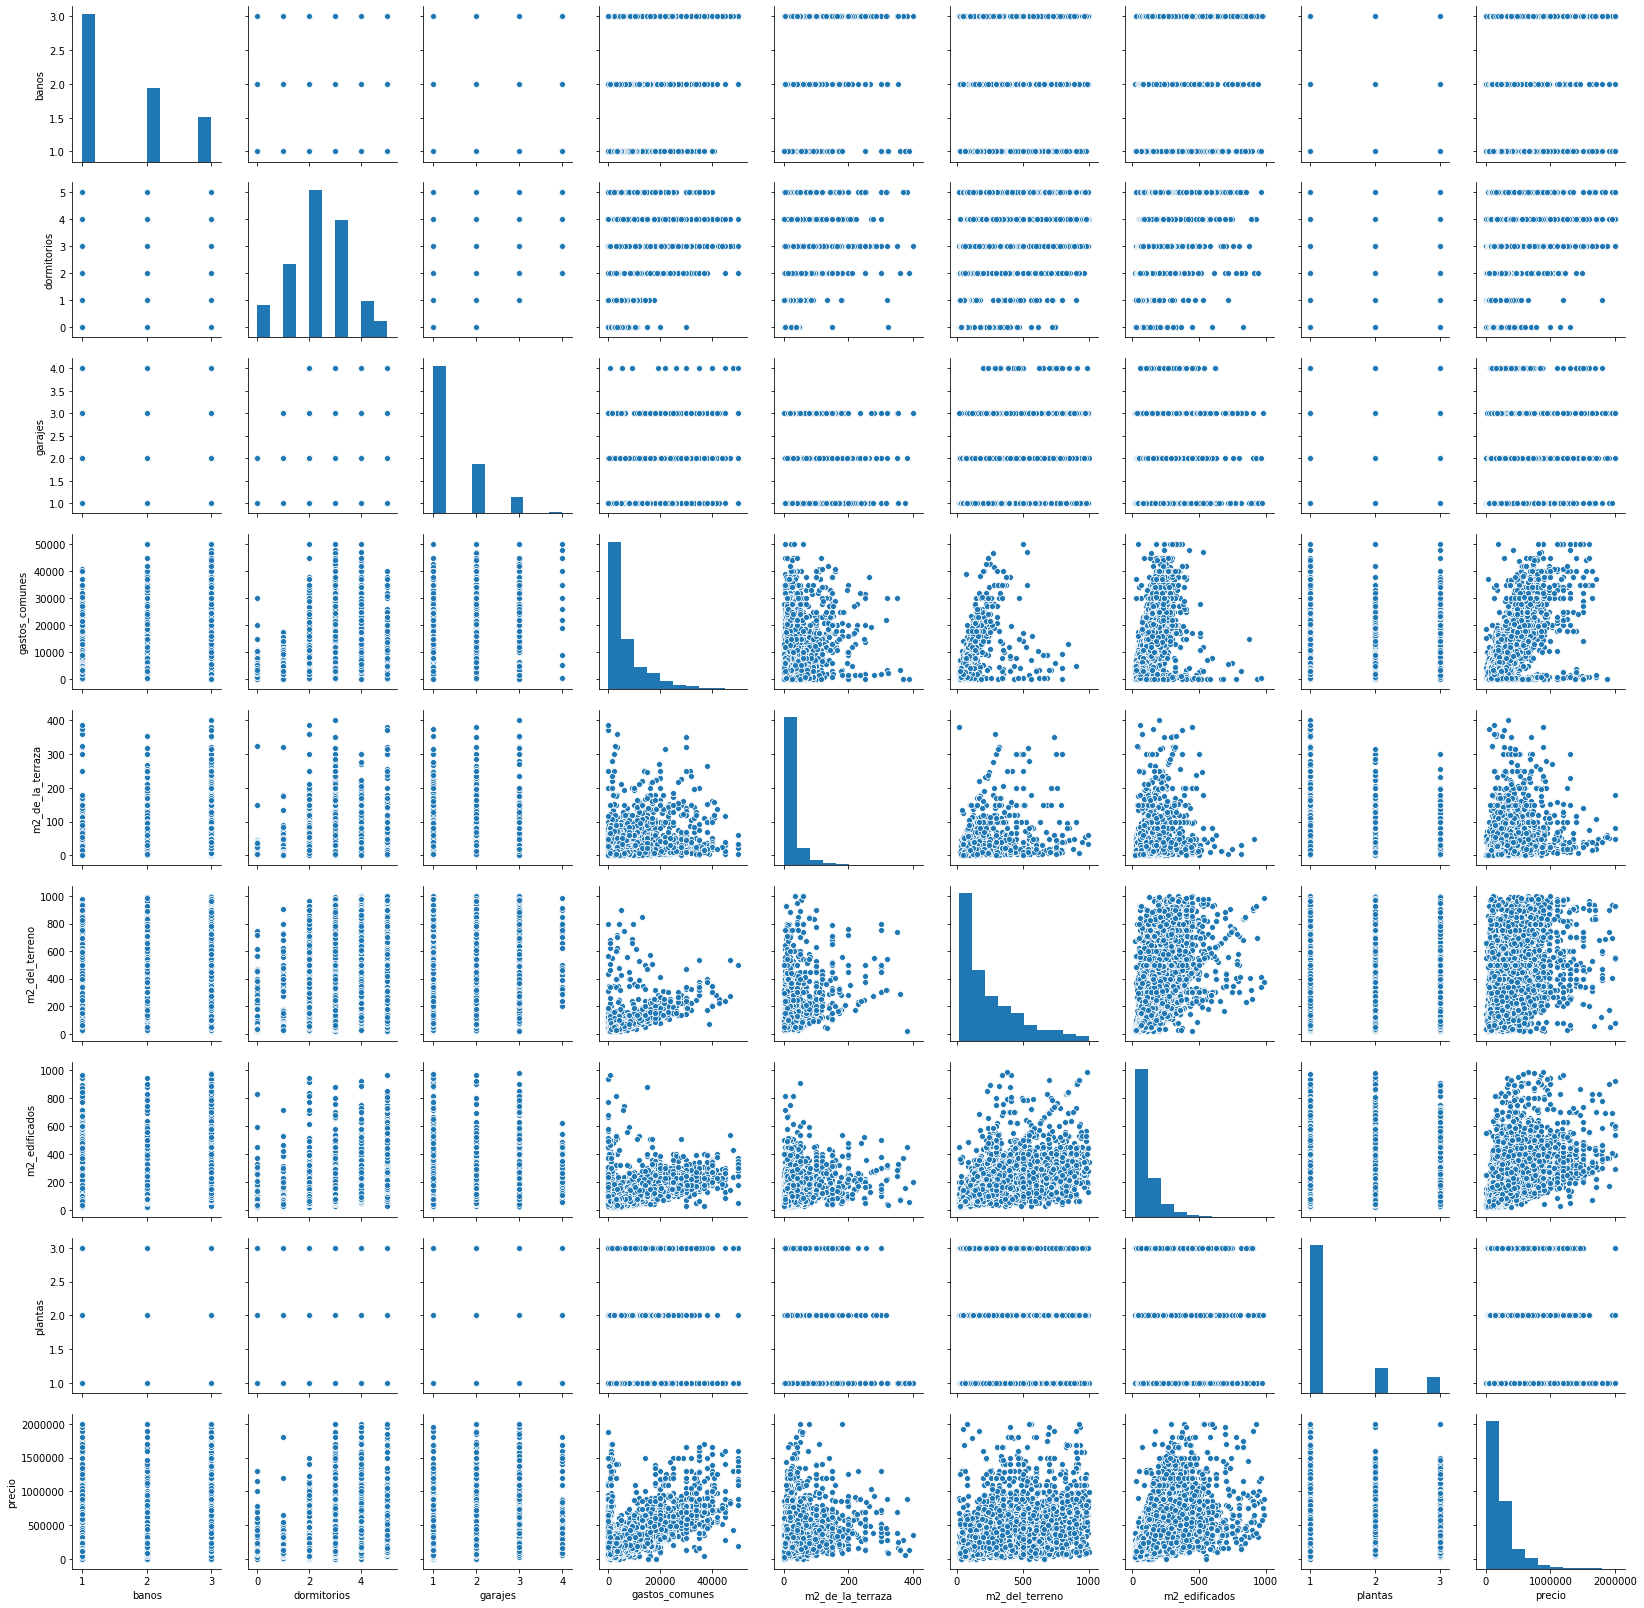

In [29]:
# Select continuous feature and make a pairplot
features = [
    'banos',
    'dormitorios',
    'garajes',
    'gastos_comunes',
    'm2_de_la_terraza',
    'm2_del_terreno',
    'm2_edificados',
    'plantas',
    'precio',
]
sns.pairplot(df[features]);

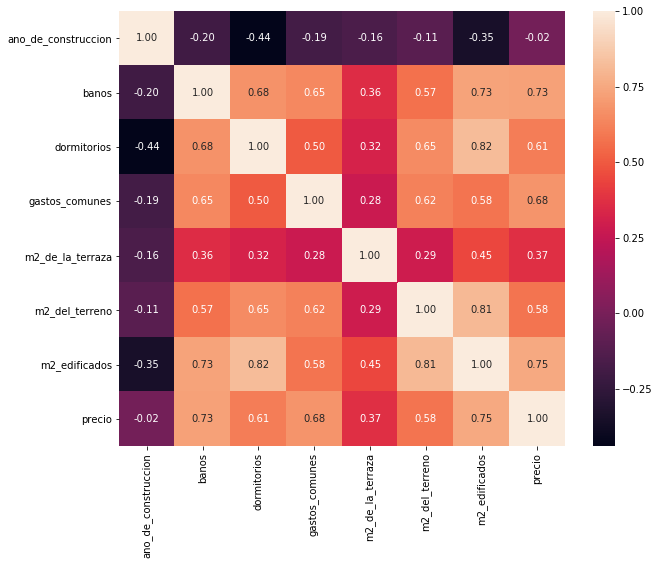

In [30]:
# Select continuous feature, compute correlations between them and make a heatmap
features = [
    'ano_de_construccion',
    'banos',
    'dormitorios',
    'gastos_comunes',
    'm2_de_la_terraza',
    'm2_del_terreno',
    'm2_edificados',
    'precio',
]
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df[features].corr(method='spearman'), annot=True, fmt='.02f', ax=ax)

In [31]:
df.pivot_table(index='banos', columns='banos_extra', values='precio', aggfunc='count')

banos_extra,False,True
banos,,
1.00,15960.00,nan
2.00,7960.00,nan
3.00,nan,4837.00


In [32]:
df.pivot_table(index='dormitorios', columns='dormitorios_extra', values='precio', aggfunc='count')

dormitorios_extra,False,True
dormitorios,,
0.00,2047.00,nan
1.00,4652.00,nan
2.00,9316.00,nan
3.00,7416.00,nan
4.00,2313.00,nan
5.00,nan,1010.00


# Data cleaning

**"The quality and quantity of data that you gather will directly determine how good your predictive model can be."**

## Remove Unwanted observations
Duplicate observations most frequently arise during data collection, such as when you:

- Combine datasets from multiple places
- Scrape data

### Drop Irrelevant features
Check dataset [documentation](https://github.com/creyesp/houses-project/blob/add-binder-configs/data/dataset_description.md) to choose the less informative feature to answer our questions.

In [33]:
df.columns

Index(['index', 'acepta_permuta', 'altura_permitida', 'ambientes',
       'ambientes_extra', 'ano_de_construccion', 'aptos_por_piso', 'banos',
       'banos_extra', 'cantidad_de_pisos', 'casco', 'descripcion', 'direccion',
       'disposicion', 'distancia_al_mar', 'dormitorios', 'dormitorios_extra',
       'estado', 'extra', 'financia', 'garajes', 'garajes_extra',
       'gastos_comunes', 'gastos_comunes_moneda', 'hectareas', 'huespedes',
       'inmobiliaria', 'longitud_frente', 'm2_de_la_terraza', 'm2_del_terreno',
       'm2_edificados', 'oficina', 'penthouse', 'piso', 'plantas',
       'plantas_extra', 'precio', 'precio_moneda', 'referencia', 'sobre',
       'tipo_propiedad', 'tipo_publicacion', 'titulo_publicacion', 'url',
       'vista_al_mar', 'vivienda_social', 'zona'],
      dtype='object')

In [34]:
columns_to_drop = [
    'acepta_permuta',
    'altura_permitida',
    'ambientes',
    'ambientes_extra',
    'aptos_por_piso',
    'banos_extra',
    'cantidad_de_pisos',
    'casco',
    'direccion',
    'dormitorios_extra',
    'financia',
    'gastos_comunes_moneda',
    'garajes_extra',
    'hectareas',
    'huespedes',
    'inmobiliaria',
    'longitud_frente',
    'piso',
    'garajes_extra',
    'precio_moneda',
    'plantas_extra',
    'referencia',
    'titulo_publicacion',
    'url',
    'sobre',
]
df_clean = df.drop(columns=columns_to_drop)
df_clean.dtypes

index                    int64
ano_de_construccion    float64
banos                  float64
descripcion             object
disposicion             object
distancia_al_mar       float64
dormitorios            float64
estado                  object
extra                   object
garajes                float64
gastos_comunes         float64
m2_de_la_terraza       float64
m2_del_terreno         float64
m2_edificados          float64
oficina                float64
penthouse              float64
plantas                float64
precio                 float64
tipo_propiedad          object
tipo_publicacion        object
vista_al_mar           float64
vivienda_social        float64
zona                    object
dtype: object

### Drop Irrelevant observations

In [35]:
# mask_property = df_clean['tipo_propiedad'].isin(['apartamentos', 'casas'])
# df_clean = df_clean.loc[mask_property, :]

mask_drop = (
    (df_clean['oficina'] == 1)
    | ~df_clean['tipo_propiedad'].isin(['apartamentos', 'casas'])
)

df_clean.drop(index=mask_drop[mask_drop].index, inplace=True)
 

### Drop duplicate entries
Some times our dataset is collected from many sources and joined together to form one dataset. So duplicated entities or saples is posibility and we could remove these samples to avoid errors in our analysis

In [36]:
df_clean.duplicated().sum()

0

In [37]:
df_clean.drop_duplicates(inplace=True)

## Fix Structural Errors
This type of error are more common in categorical features and occurre during measurement, data transfer or some previos transformations. For instance, you can check for typos or inconsistent capitalization.

In [38]:
remap_name = {
#     'cerrito': ['cerro', 'cerrito'],
#     'carrasco': ['carrasco', 'carrasco este', 'carrasco norte', 'carrasco - barrios con seguridad'],
}
for key, values in remap_name.items():
    mask = df_clean['zona'].isin(values)
    df_clean.loc[mask, 'zona'] = key


## Missing values imputation
There are more sophisticated method to make missing imputation like [Iterative Imputer](https://towardsdatascience.com/4-tips-for-advanced-feature-engineering-and-preprocessing-ec11575c09ea).

Some features have only 1 valid value and the rest of the values are Nan (Not a number), ex. "oficina" column. In this case we can infer that missing value is 0. 
- **Look at what features we can replace Nan values with 0**.

There are other features that nan values should be replacing with a specific value, ex. "plantas", if a house or apartment doesn't have a valid value then default value should be 1.
- **Look at what feature we can replace Nan values with specific values**.


https://elitedatascience.com/data-cleaning


In [39]:
# Fill missing values with zero
fill_zero_col = [
    'm2_de_la_terraza',
    'vivienda_social',
    'gastos_comunes',
    'garajes',
    'penthouse',
    'oficina',
    'vista_al_mar',
]
df_clean.loc[:, fill_zero_col] = df_clean[fill_zero_col].fillna(0)

# Fill missing values with 1
df_clean['plantas'].fillna(1, inplace=True)

In [40]:
df_clean['ano_de_construccion'].fillna(1950, inplace=True)

We can infer some values of a column from other column, for example we can fill nan values in "m2_del_terreno" from "m2_edificados".
- **Select nan values from  "m2_del_terreno" and fill it with "m2_edificados".**

In [41]:
# Fill missing value usings other columns
mask_m2_terreno = df_clean['m2_del_terreno'].isna()
df_clean.loc[mask_m2_terreno, 'm2_del_terreno'] = df_clean.loc[mask_m2_terreno, 'm2_edificados']

Also we can use some statistical metrics to fill missing values, like mean, median, mode, etc.
- **Compute the median of "m2_edificados" and fill nan values with this result.**

In [42]:
df_clean['m2_edificados'].fillna(df_clean['m2_edificados'].median(), inplace=True)

For categorical feature we can add a new category to fill missing values
- **Replace nan values with a defaul category for following feature:**
    - "barrio"
    - "disposicion"
    - "tipo_propiedad"

In [43]:
# Fill missing categories
df_clean['zona'].fillna('desconocido', inplace=True)
df_clean['disposicion'].fillna('otra', inplace=True)
df_clean['tipo_propiedad'].fillna('otros', inplace=True)
df_clean['estado'].fillna('otro', inplace=True)

## Filter Unwanted Outliers
Outliers can cause problems with certain types of models. For example, linear regression models are less robust to outliers than decision tree models.

In general, if you have a legitimate reason to remove an outlier, it will help your model’s performance.

However, outliers are innocent until proven guilty. You should never remove an outlier just because it’s a "big number." That big number could be very informative for your model.

We can’t stress this enough: you must have a good reason for removing an outlier, such as suspicious measurements that are unlikely to be real data.

------------------------

Some variable or samples are not relevant for our analysis, for example we want to predict the price of houses and apartment, so we need create a filter the feature 'tipo_propiedad' to get a subset of samples. On the other hand, we could in features that have a cardinality of 1 (for categorical features), or zero or very low variance (for continuous features). Such features do not provide much information and are not useful for building predictive models.

- **Get percentile 5 and 95 or 1 and 99 to get a hint of posibles filter to get a clean dataset.**

In [44]:
df_clean.quantile([0.05, 0.95])

,index,ano_de_construccion,banos,distancia_al_mar,dormitorios,garajes,gastos_comunes,m2_de_la_terraza,m2_del_terreno,m2_edificados,oficina,penthouse,plantas,precio,vista_al_mar,vivienda_social
0.05,1818.40,1943.00,1.00,0.00,0.00,0.00,0.00,0.00,35.00,35.00,0.00,0.00,1.00,79000.00,0.00,0.00
0.95,53567.60,2019.00,3.00,1000.00,4.00,2.00,18000.00,39.00,485.00,260.00,0.00,0.00,3.00,680000.00,1.00,1.00


In [45]:
df_clean.isna().sum()

index                      0
ano_de_construccion        0
banos                     80
descripcion                0
disposicion                0
distancia_al_mar       19191
dormitorios               37
estado                     0
extra                      0
garajes                    0
gastos_comunes             0
m2_de_la_terraza           0
m2_del_terreno          1024
m2_edificados              0
oficina                    0
penthouse                  0
plantas                    0
precio                     0
tipo_propiedad             0
tipo_publicacion           0
vista_al_mar               0
vivienda_social            0
zona                       0
dtype: int64

- Create a filter for following features to get :
  - banos
  - dormitorios
  - garajes
  - m2_de_la_terraza
  - m2_edificados
  - m2_del_terreno
  - gastos_comunes
  - precio
  - ano_de_construccion


In [46]:
mask_outliers = (
    (df_clean['banos'].between(1, 3))
    & (df_clean['dormitorios'].between(0, 5))
    & (df_clean['garajes'].between(0, 4))
    & (df_clean['m2_de_la_terraza'].between(0, 400))
    & (df_clean['m2_edificados'] >= 20)
    & (df_clean['m2_del_terreno']>= 20)
    & (df_clean['gastos_comunes'].between(0, 5e4))
    & (df_clean['precio'].between(1e4, 2e6))
    & (df_clean['ano_de_construccion'].fillna(2000).between(1880, 2019))
)
mask_outliers.sum()

21822

# Feature Engineering

Feature engineering is the process to transform raw data in a data set to be used in the next step (modeling). For real problems, this step is a labor-instensive process that demand a time, creativity and domain knowledge.    

Everything measurable can be used as a feature, but our goal in this step is select and create informative features, those would allow the learning algorithm to build a model that reach a high predict power. In our case  'm2_cosntruidos' or 'dormitorios' are probably very important features.

When a model predict the train data well, it has a **low bias**


## Split dataset in numerical and string variables
Pandas has a method to split dataset group by dtypes:
- **'object'**: To select strings you must use the object dtype
- **'number'**: To select all numeric types
- **'category'**: To select Pandas categorical dtypes
- **'datetime'**: To select datetimes
- **'timedelta'**: To select timedeltas

In [47]:
df_clean[mask_outliers].dtypes

index                    int64
ano_de_construccion    float64
banos                  float64
descripcion             object
disposicion             object
distancia_al_mar       float64
dormitorios            float64
estado                  object
extra                   object
garajes                float64
gastos_comunes         float64
m2_de_la_terraza       float64
m2_del_terreno         float64
m2_edificados          float64
oficina                float64
penthouse              float64
plantas                float64
precio                 float64
tipo_propiedad          object
tipo_publicacion        object
vista_al_mar           float64
vivienda_social        float64
zona                    object
dtype: object

In [48]:
df_num = df_clean[mask_outliers].select_dtypes(include='number')
df_obj = df_clean[mask_outliers].select_dtypes(include='object')

print('Numerical columns: {}\n'.format(df_num.columns.tolist()))
print('Caterorial columns: {}'.format(df_obj.columns.tolist()))

Numerical columns: ['index', 'ano_de_construccion', 'banos', 'distancia_al_mar', 'dormitorios', 'garajes', 'gastos_comunes', 'm2_de_la_terraza', 'm2_del_terreno', 'm2_edificados', 'oficina', 'penthouse', 'plantas', 'precio', 'vista_al_mar', 'vivienda_social']

Caterorial columns: ['descripcion', 'disposicion', 'estado', 'extra', 'tipo_propiedad', 'tipo_publicacion', 'zona']


 ## Feature transformation
 

We can create new features applying some functions or filters to transform them and get a more informative features. Apply the following transformation:
- **Create a binary feature called "cerca_rambla" which is 1 when "distancia_al_mar" < 1000 or "vista_al_mar" is 1, in other case set it to 0.**
- **Create a feature called "m2_index" which is the ratio between "m2_edificados" and "m2_del_terreno"**
- **Create a binary feature called "es_casa" which is 1 if "tipo_propiedad" == 'casas' and 0 is "tipo_propiedad" == 'apartamentos'.**
- **Create a binary feature called "parrillero" if "extra" feature contain 'parrillero'**

In [49]:
df_num['cerca_rambla'] = (df_num['distancia_al_mar'] <= 1000) | (df_num['vista_al_mar'] ).astype(float)

df_num['m2_index'] = df_num['m2_edificados']/df_num['m2_del_terreno']

df_num['es_casa'] = df_obj['tipo_propiedad'].map({'casas':1, 'apartamentos': 0})

df_num['parrilero'] = df_obj['extra'].str.contains('parrillero').fillna(False)

drop_col = ['distancia_al_mar', 'vista_al_mar', 'm2_del_terreno', ]
df_num.drop(columns=drop_col, inplace=True)

### Binning
Data binning allows you to split continuous numerical data into bins (categorical feature) to get a more informative feature.      
Some variables like years or ages is an example of a feature type that might benefit from transformation into a binning variable.

- **Create a new variable called decada that transform "ano_de_cosntruccion" to "decada". Use pd.cut()**

In [65]:
range_decade = np.arange(1880, 2021, 10)
range_label = np.arange(1880, 2020, 10)
year = df['ano_de_construccion'].copy()
year[year < 1880] = 1880
year[year > 2019] = 2019
year.fillna(1951, inplace=True)

df_num['decada'] = pd.cut(x=year,
                          bins=range_decade,
                          labels=range_label,
                          right=False,
                         ).astype(int)

df_num.drop(columns=['ano_de_construccion'], inplace=True)

### Categorical Transformation
Categorical features could have a high number of classes due to typos or inconsistent capitalization or many classes with few representation (Sparse classes). They can be problematic for certain machine learning algorithms, causing models to be overfit.

There aren't rute to handling with this issue, depend the size of dataet and the nimber of observation in each classe, some time data scientist merge similar classes in only, other tichnique is add to the more representative class, but en our case we going to use one useful transformation, [80/20 rule or Pareto Rule](https://en.wikipedia.org/wiki/Pareto_principle), it's say that  for many events, roughly 80% of the effects come from 20% of the causes. In our case "barrio" feature has a similar behaviour.  
<img src="https://www.dansilvestre.com/wp-content/uploads/2017/12/DanSilvestre.com_-1.png" width="50%"/>

[Text(0.5, 1.0, 'Cumulative distribution of "barrio"')]

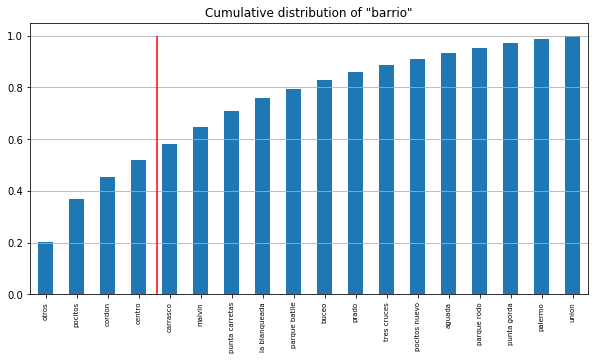

In [66]:
f, ax = plt.subplots(figsize=(10,5))
(df_obj['zona'].value_counts().cumsum()/df_obj['zona'].count()).plot(kind='bar', ax=ax)
ax.vlines(0.2*df_obj['zona'].unique().shape[0], 0, 1, color='r')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize('x-small') 
ax.grid(axis='y')
ax.set(title='Cumulative distribution of "barrio"')

In [67]:
df_obj['zona'] = handson.pareto_rule(df_obj['zona'])

Nominal features like "barrio" can be transformed into a numerical variable applying **ONE-HOT encoding**.
<img src="img/one-hot-encoding.png" />

- **Apply one-hot encoding on Pareto's transformation of "bario" feature and add prefix='ZN_', then assign to zona variable.**
- **Apply one-hot encoding on "disposicion" feature and add prefix='DISP_', then assign to zona disp.**


In [68]:
zona = pd.get_dummies(df_obj['zona'], prefix='ZN_',)
zona.head()

,ZN__carrasco,ZN__centro,ZN__cordon,ZN__la blanqueada,ZN__malvin,ZN__otros,ZN__parque batlle,ZN__pocitos,ZN__punta carretas
0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0,0,0


In [69]:
disp = pd.get_dummies(df_obj['disposicion'], prefix='DISP_')
disp.head()

,DISP__,DISP__al frente,DISP__contrafrente,DISP__interior,DISP__lateral
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
5,1,0,0,0,0


### Ordinal transformation
Some categorical features are ordinal, then we can map them to a numerical values in a specific order
- **Create a dictionary with all possible values of "estado" feature and assign a numerical value, where min value is the worse status and the max value is the best status of properties. Then map these values to a "estado" feature.**


In [70]:
df_obj['estado'].unique()

array(['a estrenar', 'buen estado', 'excelente estado', 'en construccion',
       'requiere mantenimiento', 'reciclada', 'a reciclar', ''],
      dtype=object)

In [71]:
# Categorical transformation
map_status = {
    'en construccion': 3,
    'a estrenar': 3,
    'excelente estado': 3,
    'buen estado': 2,
    'reciclada': 2,
    'requiere mantenimiento': 1,
    'a reciclar': 0,
    '': -1,
}
state = df_obj['estado'].map(map_status)
state.name = 'estado'


## Drop no informative columns and drop missing row

In [72]:
mask_zero_std = (df_num.std() == 0)
zero_std_col = mask_zero_std[mask_zero_std].index
print(zero_std_col)
df_num.drop(columns=zero_std_col, inplace=True)

Index([], dtype='object')


Finally concatenate all new features and drop redundant 

In [73]:
df_num.isna().sum()

index               0
banos               0
dormitorios         0
garajes             0
gastos_comunes      0
m2_de_la_terraza    0
m2_edificados       0
penthouse           0
plantas             0
precio              0
vivienda_social     0
cerca_rambla        0
m2_index            0
es_casa             0
parrilero           0
decada              0
dtype: int64

In [74]:
df_num_final = pd.concat([df_num, zona, disp, state], axis=1)
df_cat_final = pd.concat([df_num, df_obj[['zona', 'disposicion', 'estado',]]], axis=1)

In [75]:
handson.info(df_num_final).T

,index,banos,dormitorios,garajes,gastos_comunes,m2_de_la_terraza,m2_edificados,penthouse,plantas,precio,vivienda_social,cerca_rambla,m2_index,es_casa,parrilero,decada,ZN__carrasco,ZN__centro,ZN__cordon,ZN__la blanqueada,ZN__malvin,ZN__otros,ZN__parque batlle,ZN__pocitos,ZN__punta carretas,DISP__,DISP__al frente,DISP__contrafrente,DISP__interior,DISP__lateral,estado
dtypes,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,int64,bool,int64,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,uint8,int64
isnull,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
%null,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
nunique,21822,3,6,5,867,202,497,2,3,1855,2,2,2753,2,2,13,2,2,2,2,2,2,2,2,2,2,2,2,2,2,5


In [76]:
handson.info(df_cat_final).T

,index,banos,dormitorios,garajes,gastos_comunes,m2_de_la_terraza,m2_edificados,penthouse,plantas,precio,vivienda_social,cerca_rambla,m2_index,es_casa,parrilero,decada,zona,disposicion,estado
dtypes,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,float64,int64,bool,int64,object,object,object
isnull,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
%null,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
nunique,21822,3,6,5,867,202,497,2,3,1855,2,2,2753,2,2,13,9,5,8


In [77]:
df_num_final.describe()

,index,banos,dormitorios,garajes,gastos_comunes,m2_de_la_terraza,m2_edificados,penthouse,plantas,precio,vivienda_social,m2_index,es_casa,decada,ZN__carrasco,ZN__centro,ZN__cordon,ZN__la blanqueada,ZN__malvin,ZN__otros,ZN__parque batlle,ZN__pocitos,ZN__punta carretas,DISP__,DISP__al frente,DISP__contrafrente,DISP__interior,DISP__lateral,estado
count,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00,21822.00
mean,21495.84,1.63,2.27,0.61,3814.87,6.91,103.80,0.02,1.22,252391.69,0.06,0.94,0.24,1970.01,0.06,0.07,0.08,0.05,0.06,0.41,0.04,0.17,0.06,0.25,0.62,0.08,0.03,0.02,2.42
std,16403.80,0.76,1.13,0.81,6655.30,23.34,83.78,0.13,0.54,216152.16,0.24,0.31,0.43,27.19,0.25,0.25,0.28,0.22,0.24,0.49,0.19,0.37,0.24,0.43,0.49,0.27,0.17,0.14,0.71
min,0.00,1.00,0.00,0.00,0.00,0.00,20.00,0.00,1.00,11250.00,0.00,0.05,0.00,1890.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1.00
25%,9139.50,1.00,2.00,0.00,0.00,0.00,54.00,0.00,1.00,129000.00,0.00,1.00,0.00,1950.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00
50%,18399.50,1.00,2.00,0.00,1.00,0.00,75.00,0.00,1.00,175000.00,0.00,1.00,0.00,1950.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,3.00
75%,27513.75,2.00,3.00,1.00,4500.00,3.00,122.00,0.00,1.00,295000.00,0.00,1.00,0.00,2000.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,3.00
max,85010.00,3.00,5.00,4.00,50000.00,400.00,941.00,1.00,3.00,2000000.00,1.00,22.50,1.00,2010.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3.00


## Save ready dataset 

In [78]:
df_num_final.to_csv('../data/dataset_ready.csv', index=False)
df_cat_final.to_csv('../data/dataset_cat_ready.csv', index=False)

In [79]:
df_num_final.isna().sum()

index                 0
banos                 0
dormitorios           0
garajes               0
gastos_comunes        0
m2_de_la_terraza      0
m2_edificados         0
penthouse             0
plantas               0
precio                0
vivienda_social       0
cerca_rambla          0
m2_index              0
es_casa               0
parrilero             0
decada                0
ZN__carrasco          0
ZN__centro            0
ZN__cordon            0
ZN__la blanqueada     0
ZN__malvin            0
ZN__otros             0
ZN__parque batlle     0
ZN__pocitos           0
ZN__punta carretas    0
DISP__                0
DISP__al frente       0
DISP__contrafrente    0
DISP__interior        0
DISP__lateral         0
estado                0
dtype: int64

Not all of the features you engineer need to be winners. In fact, **you’ll often find that many of them don’t improve your model.** That’s fine and we going to see that some algorithm could show us how important are feature in the prediction. There are many techniques to select the most informative feature to avoid overffiting.
